# Supervised Learning: DT2

In [21]:
import warnings
warnings.filterwarnings(action='ignore')
from preamble import *

## 결정 트리
### 결정 트리의 복잡도 제어하기

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [23]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

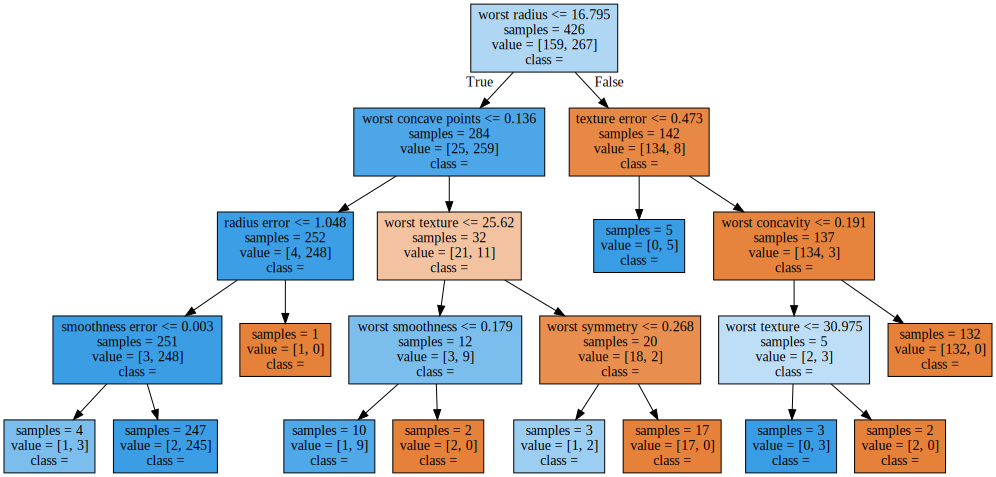

In [25]:
import graphviz

with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 모든 노드가 pure node 이면 오버피팅이 일어날 가능성이 높다.

### 트리의 특성 중요도

In [26]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


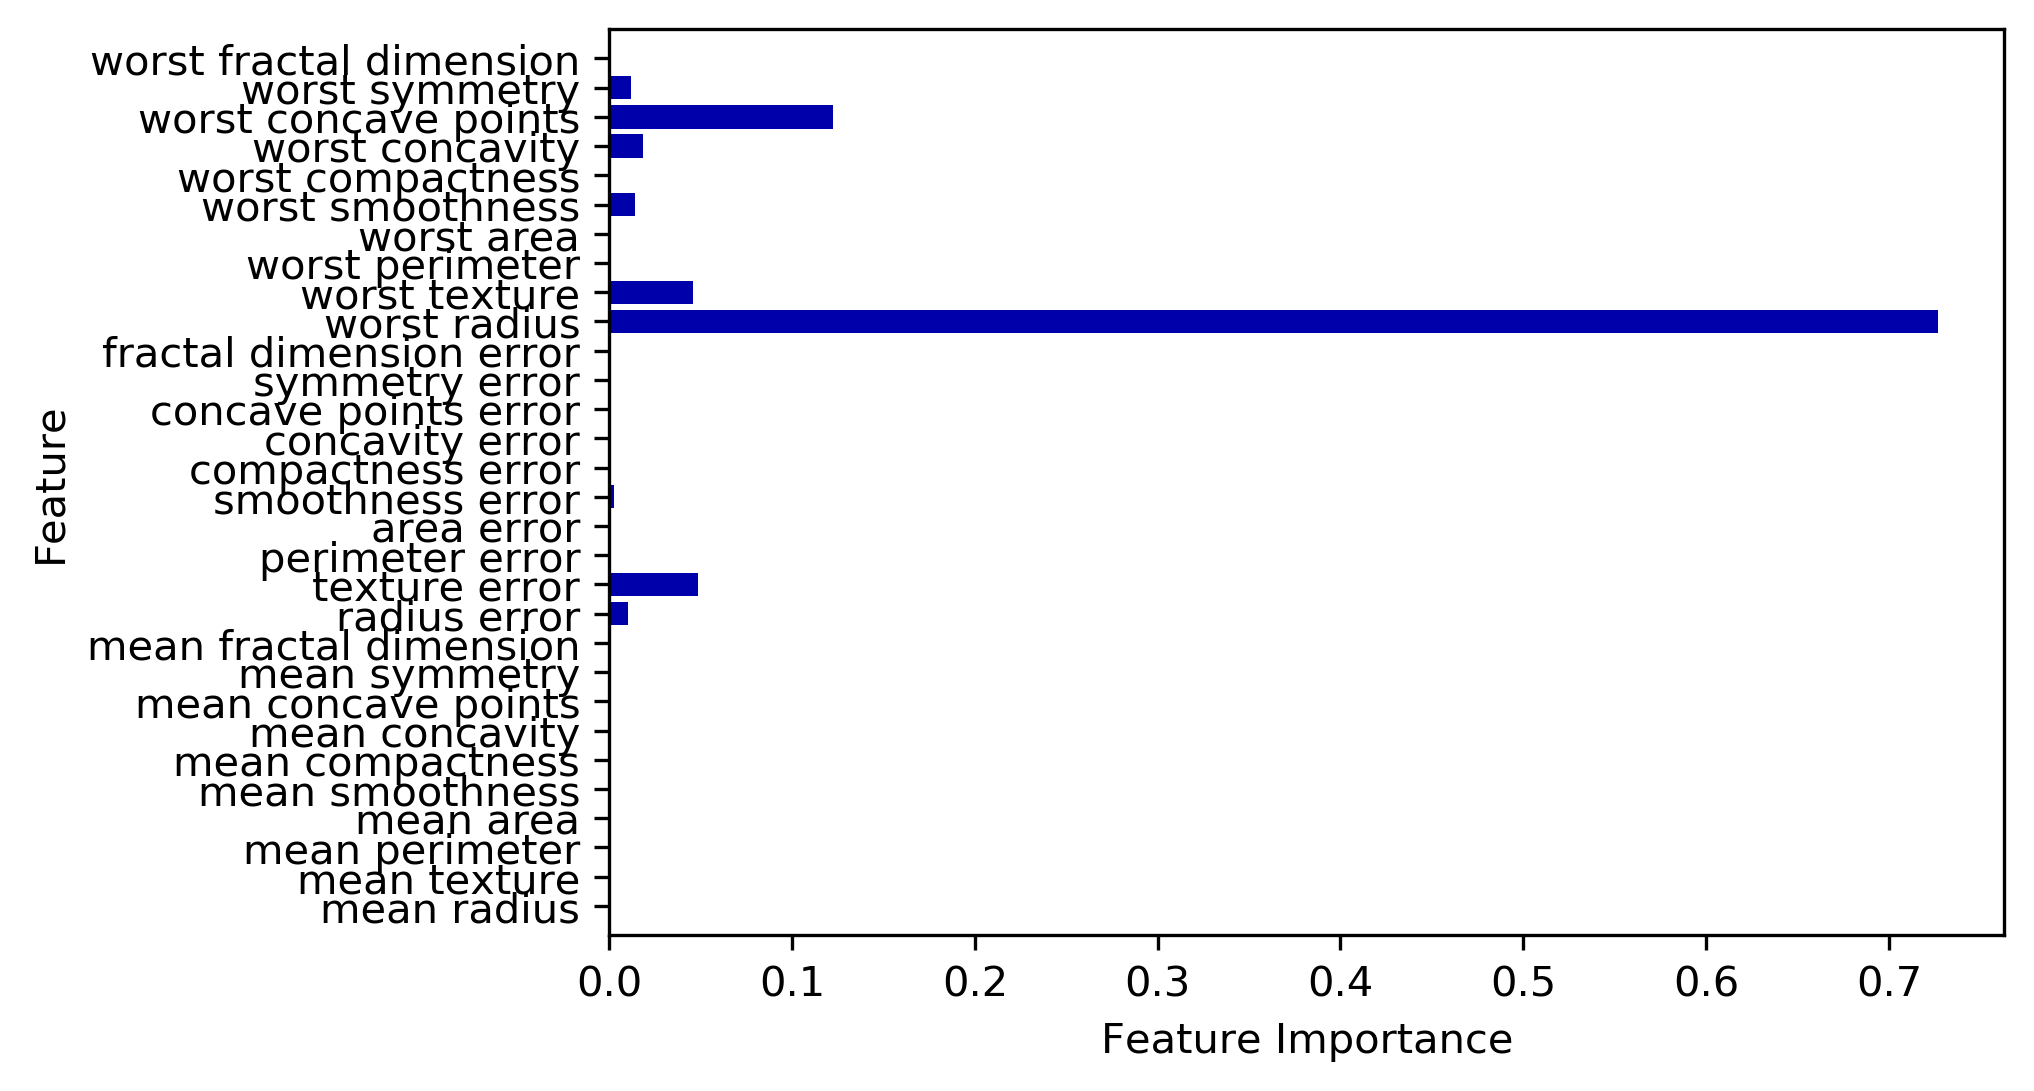

In [28]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


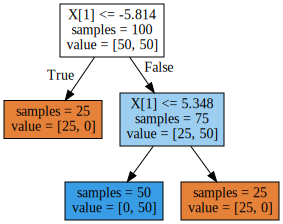

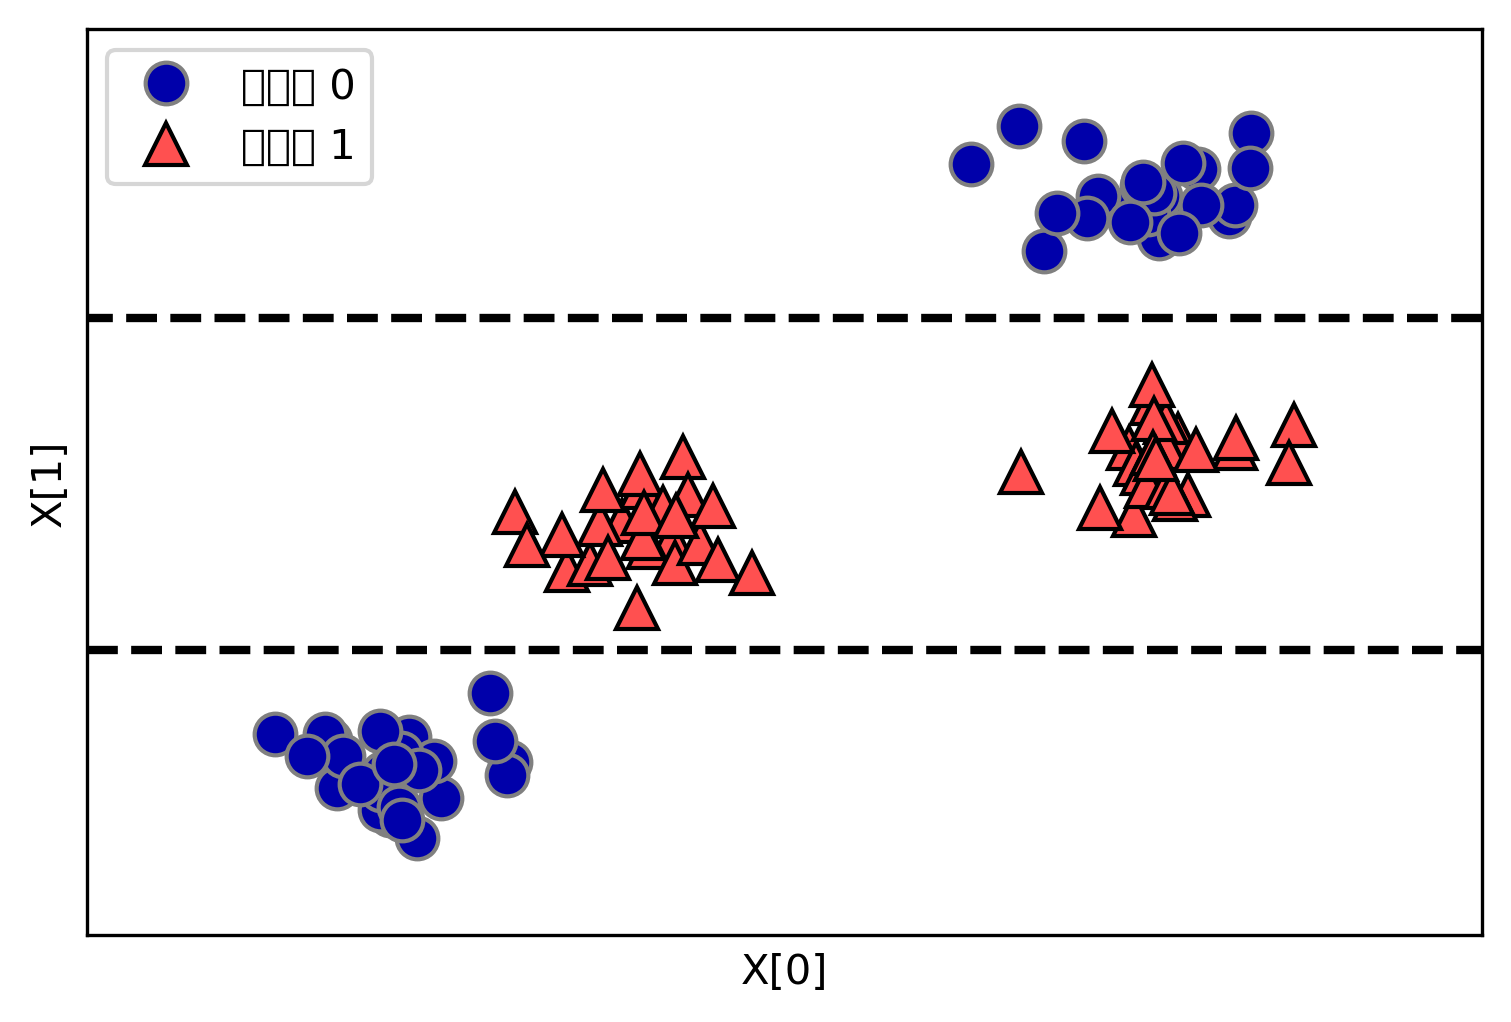

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)